In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications import EfficientNetB0
from keras.layers import Dropout, Dense, Flatten

In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers, Input
from tensorflow.keras.layers import Dense, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from keras import Model

In [ ]:
train_folder = '/content/gdrive/My Drive/Winter 2022/Deep Learning/lung _cancer_Dataset/train_og/'
val_folder = '/content/gdrive/My Drive/Winter 2022/Deep Learning/lung _cancer_Dataset/valid_og/'
test_folder = '/content/gdrive/My Drive/Winter 2022/Deep Learning/lung _cancer_Dataset/test/'

In [ ]:
class_names = os.listdir(train_folder) # Get names of classes
class_name2id = { label: index for index, label in enumerate(class_names) } # Map class names to integer labels

In [ ]:
class_names

['bbps-0-1',
 'bbps-2-3',
 'cecum',
 'ulcerative-colitis-grade-2',
 'dyed-resection-margins',
 'pylorus',
 'z-line',
 'retroflex-stomach',
 'esophagitis-a',
 'retroflex-rectum',
 'polyps',
 'dyed-lifted-polyps']

In [ ]:
# Directory with class pictures
for i in range(len(class_names)):
    locals()["class"+str(i)] = os.path.join(train_folder, class_names[i])

In [ ]:
class_cnt = []
for k in range(len(class_names)):
  class_cnt.append(len(os.listdir(locals()["class"+str(k)])))
  print("Number of images in",class_names[k],":", len(os.listdir(locals()["class"+str(k)])))

Number of images in bbps-0-1 : 400
Number of images in bbps-2-3 : 500
Number of images in cecum : 518
Number of images in ulcerative-colitis-grade-2 : 300
Number of images in dyed-resection-margins : 500
Number of images in pylorus : 509
Number of images in z-line : 500
Number of images in retroflex-stomach : 502
Number of images in esophagitis-a : 200
Number of images in retroflex-rectum : 200
Number of images in polyps : 506
Number of images in dyed-lifted-polyps : 517


In [ ]:
sum(class_cnt)

5152

In [ ]:
# Directory with class pictures
for i in range(len(class_names)):
    locals()["val"+str(i)] = os.path.join(val_folder, class_names[i])

In [ ]:
val_cnt = []
for k in range(len(class_names)):
  val_cnt.append(len(os.listdir(locals()["val"+str(k)])))
  print("Number of images in",class_names[k],":", len(os.listdir(locals()["val"+str(k)])))

Number of images in bbps-0-1 : 100
Number of images in bbps-2-3 : 200
Number of images in cecum : 100
Number of images in ulcerative-colitis-grade-2 : 80
Number of images in dyed-resection-margins : 200
Number of images in pylorus : 200
Number of images in z-line : 200
Number of images in retroflex-stomach : 100
Number of images in esophagitis-a : 100
Number of images in retroflex-rectum : 80
Number of images in polyps : 200
Number of images in dyed-lifted-polyps : 101


In [ ]:
sum(val_cnt)

1661

In [ ]:
# Directory with class pictures
for i in range(len(class_names)):
    locals()["test"+str(i)] = os.path.join(test_folder, class_names[i])

In [ ]:
test_cnt = []
for k in range(len(class_names)):
  try:
    test_cnt.append(len(os.listdir(locals()["test"+str(k)])))
    print("Number of images in",class_names[k],":", len(os.listdir(locals()["test"+str(k)])))
  except:
    test_cnt.append(0)
    print("Number of images in",class_names[k],":", 0)

Number of images in bbps-0-1 : 74
Number of images in bbps-2-3 : 106
Number of images in cecum : 95
Number of images in ulcerative-colitis-grade-2 : 26
Number of images in dyed-resection-margins : 105
Number of images in pylorus : 105
Number of images in z-line : 109
Number of images in retroflex-stomach : 68
Number of images in esophagitis-a : 37
Number of images in retroflex-rectum : 41
Number of images in polyps : 96
Number of images in dyed-lifted-polyps : 102


In [ ]:
sum(test_cnt)

964

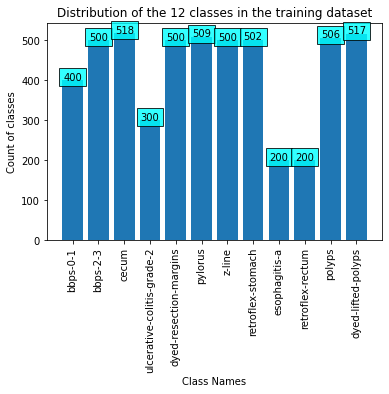

In [ ]:
import matplotlib.pyplot as plt

def valuelabel(weight,students):
    for i in range(len(weight)):
        plt.text(i,students[i],students[i], ha = 'center',
                 bbox = dict(facecolor = 'cyan', alpha =0.8))


# making the bar chart on the data
plt.bar(class_names, class_cnt)

valuelabel(class_names, class_cnt) 
  
# giving title to the plot
plt.title("Distribution of the 12 classes in the training dataset")
  
# giving X and Y labels
plt.xlabel("Class Names")
plt.ylabel("Count of classes")

plt.xticks(rotation='vertical')

# visualizing the plot
plt.show()



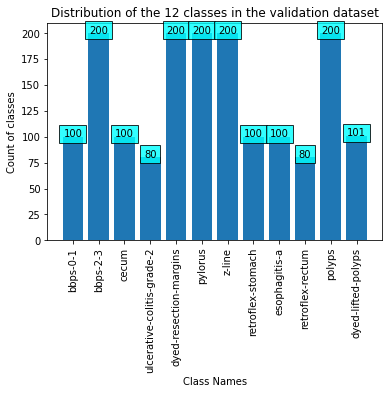

In [ ]:
# making the bar chart on the data
plt.bar(class_names, val_cnt)

valuelabel(class_names, val_cnt) 
  
# giving title to the plot
plt.title("Distribution of the 12 classes in the validation dataset")
  
# giving X and Y labels
plt.xlabel("Class Names")
plt.ylabel("Count of classes")

plt.xticks(rotation='vertical')

# visualizing the plot
plt.show()

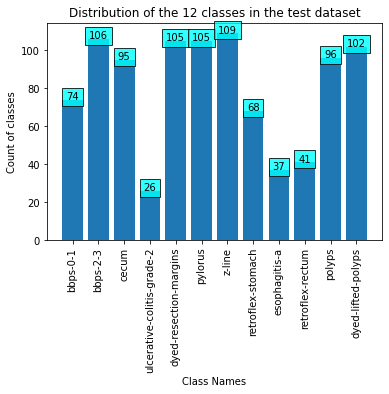

In [ ]:
# making the bar chart on the data
plt.bar(class_names, test_cnt)

valuelabel(class_names, test_cnt) 
  
# giving title to the plot
plt.title("Distribution of the 12 classes in the test dataset")
  
# giving X and Y labels
plt.xlabel("Class Names")
plt.ylabel("Count of classes")

plt.xticks(rotation='vertical')

# visualizing the plot
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(
        rescale = 1./255.,
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 40,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        shear_range = 0.2,
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [ ]:
batch_size = 128

In [ ]:
train_generator = train_datagen.flow_from_directory(train_folder, batch_size = batch_size, classes = class_names, class_mode = 'categorical', target_size = (200, 200))

Found 5152 images belonging to 12 classes.


In [ ]:
# All images will be rescaled by 1./255
test_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
val_generator = test_datagen.flow_from_directory(
        val_folder,  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = class_names,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical',
        shuffle=False)

# Flow training images in batches of 128 using train_datagen generator
test_generator = test_datagen.flow_from_directory(
        test_folder,  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = class_names,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical',
        shuffle=False)

Found 1660 images belonging to 12 classes.
Found 964 images belonging to 12 classes.


# **Method 2**

In [ ]:
from keras.utils.np_utils import to_categorical 
test_labels = test_generator.classes  
test_labels = to_categorical(test_labels, num_classes=len(class_names)) 

In [ ]:
len(test_labels)

964

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 12 output neurons for 12 classes with the softmax activation
    tf.keras.layers.Dense(12, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
total_sample=train_generator.n

In [ ]:
val_sample = val_generator.n

In [ ]:
n_epochs = 30

In [ ]:
from sklearn.utils import class_weight
import numpy as np

# class_weights = class_weight.compute_class_weight(
#            'balanced',
#             np.unique(train_generator.classes), 
#             train_generator.classes)

class_weights = class_weight.compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_generator.classes),
                                        y = train_generator.classes                                                    
                                    )
class_weights = dict(zip(np.unique(train_generator.classes), class_weights))
class_weights

{0: 1.0733333333333333,
 1: 0.8586666666666667,
 2: 0.8288288288288288,
 3: 1.431111111111111,
 4: 0.8586666666666667,
 5: 0.8434839554682384,
 6: 0.8586666666666667,
 7: 0.8552456839309429,
 8: 2.1466666666666665,
 9: 2.1466666666666665,
 10: 0.8484848484848485,
 11: 0.8304319793681496}

In [ ]:
dict_classes = {
 'bbps-0-1': 0,
 'bbps-2-3': 1,
 'cecum': 2,
 'ulcerative-colitis-grade-2': 3,
 'dyed-resection-margins': 4,
 'pylorus': 5,
 'z-line': 6,
 'retroflex-stomach': 7,
 'esophagitis-a': 8,
 'retroflex-rectum': 9,
 'polyps': 10,
 'dyed-lifted-polyps': 11
}
dict_classes

{'bbps-0-1': 0,
 'bbps-2-3': 1,
 'cecum': 2,
 'dyed-lifted-polyps': 11,
 'dyed-resection-margins': 4,
 'esophagitis-a': 8,
 'polyps': 10,
 'pylorus': 5,
 'retroflex-rectum': 9,
 'retroflex-stomach': 7,
 'ulcerative-colitis-grade-2': 3,
 'z-line': 6}

In [ ]:
train_generator.classes

array([ 0,  0,  0, ..., 11, 11, 11], dtype=int32)

In [ ]:
total_sample

5152

In [ ]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=int(total_sample/batch_size),
        epochs=n_epochs,
        class_weight=class_weights,
        validation_data=val_generator,
        validation_steps=int(val_sample/batch_size),
        verbose=1)
model.save_weights('first_try.h5')  # always save your weights after training or during training

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
40/40 [==============================] - 1218s 30s/step - loss: 2.0096 - acc: 0.2373 - val_loss: 1.3840 - val_acc: 0.4316
Epoch 2/30
40/40 [==============================] - 251s 6s/step - loss: 1.5825 - acc: 0.3509 - val_loss: 1.4437 - val_acc: 0.3861
Epoch 3/30
40/40 [==============================] - 248s 6s/step - loss: 1.4446 - acc: 0.4184 - val_loss: 1.2334 - val_acc: 0.4642
Epoch 4/30
40/40 [==============================] - 255s 6s/step - loss: 1.2913 - acc: 0.4814 - val_loss: 0.9326 - val_acc: 0.6921
Epoch 5/30
40/40 [==============================] - 253s 6s/step - loss: 1.2500 - acc: 0.4920 - val_loss: 0.9553 - val_acc: 0.6660
Epoch 6/30
40/40 [==============================] - 249s 6s/step - loss: 1.1873 - acc: 0.5197 - val_loss: 0.8993 - val_acc: 0.6354
Epoch 7/30
40/40 [==============================] - 254s 6s/step - loss: 1.0783 - acc: 0.5577 - val_loss: 0.9320 - val_acc: 0.5339
Epoch 8/30
40/40 [==============================] - 250s 6s/step - loss: 1.0445 -

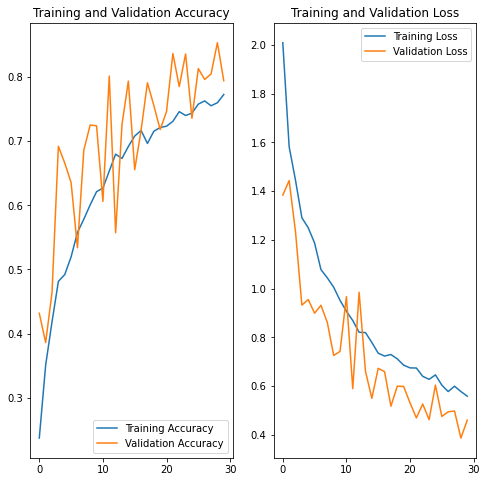

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(n_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

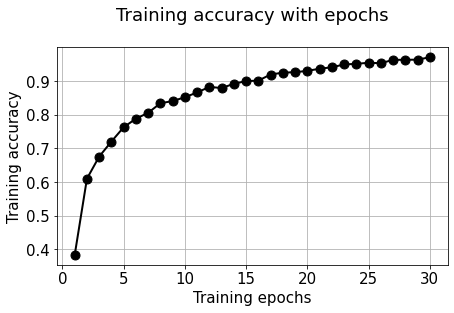

In [ ]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

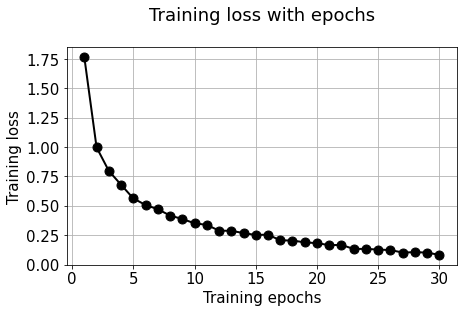

In [ ]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['loss'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training loss with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training loss",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
pred = np.round(model.predict(test_generator),0)

In [ ]:
pred[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
classification_metrics = metrics.classification_report(test_labels, pred)
print(classification_metrics)

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        74
           1       0.95      1.00      0.98       106
           2       0.89      0.94      0.91        95
           3       0.67      0.62      0.64        26
           4       0.75      0.42      0.54       105
           5       0.97      0.93      0.95       105
           6       0.88      0.40      0.55       109
           7       0.97      0.97      0.97        68
           8       0.32      0.81      0.46        37
           9       0.89      0.95      0.92        41
          10       1.00      0.89      0.94        96
          11       0.60      0.84      0.70       102

   micro avg       0.81      0.80      0.81       964
   macro avg       0.82      0.81      0.79       964
weighted avg       0.85      0.80      0.80       964
 samples avg       0.80      0.80      0.80       964



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
import itertools

In [ ]:
test_labels_tentative = pd.DataFrame(test_labels).idxmax(axis=1)
preds_tentative = pd.DataFrame(pred).idxmax(axis=1)

In [ ]:
confusion_matrix = confusion_matrix(test_labels_tentative, preds_tentative)
confusion_matrix

array([[ 69,   4,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 106,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,  89,   5,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   1,   7,  16,   0,   0,   0,   0,   0,   1,   0,   0],
       [  2,   0,   0,   0,  44,   0,   0,   0,   0,   1,   0,  58],
       [  4,   0,   0,   2,   0,  98,   1,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,  44,   1,  63,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,  66,   0,   1,   0,   0],
       [  2,   0,   0,   0,   0,   0,   5,   0,  30,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   1,   0,  39,   0,   0],
       [  2,   0,   3,   1,   0,   3,   0,   0,   0,   2,  85,   0],
       [  1,   0,   0,   0,  15,   0,   0,   0,   0,   0,   0,  86]])